# Structure Search

## Objectives
- Learn various types of structure searches including identity search, similarity search, substructure and super structure searches.
- Learn the optional parameters available for each search type.


Using PUG-REST, one can perform various types of structure searches (https://bit.ly/2lPznCo), including:
- identity search
- similarity search
- super/substructure search
- molecular formula search
<br>

As explained in a PubChem paper (https://bit.ly/2kirxky), whereas structure search can be performed in either an 'asynchronous' or 'synchronous' way, it is highly recommended to use the synchronous approach.<br>
The synchronous searches are invoked by using the keywords prefixed with ‘fast’, such as **fastidenity**, **fastsimilarity_2d**, **fastsimilarity_3d**, **fastsubstructure**, **fastsuperstructure**, and **fastformula**.

<div class="alert alert-block alert-warning">
Note: To use the python code in this lesson plan, RDKit must be installed on the system. 
</div>

Many users can simply run the following code to install RDKit.

Access to the full installation instructions can be found at the following link.
https://www.rdkit.org/docs/Install.html

## 1. Identity Search

PUG-REST allows you to search the PubChem Compound database for molecules identical to the query molecule.  PubChem's identity search supports different contexts of chemical identity, which the user can specify using the optional parameter, "identity_type".  Here are some commonly-used chemical identity contexts.
- **same_connectivity**: returns compounds with the same atom connectivity as the query molecule, ignoring stereochemistry and isotope information.
- **same_isotope**: returns compounds with the same isotopes (as well as the same atom connectivity) as the query molecule.  Stereochemistry will be ignored.
- **same_stereo**: returns compounds with the same stereochemistry (as well as the same atom connectivity) as the query molecule.  Isotope information will be ignored.
- **same_stereo_isotope**: returns compounds with the same stereochemistry AND isotope information (as well as the same atom connectivity).  This is the default.

The following code cell demostrates how these different contexts of chemical sameness affects identity search in PubChem.

#### Identity_type: same_stereo_isotope
24726 "C(/C=C/Cl)Cl"


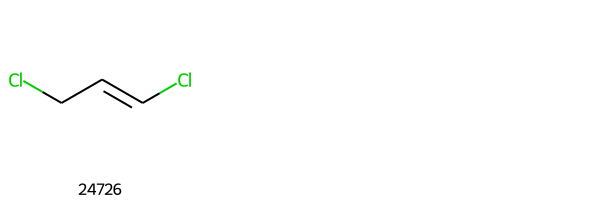

#### Identity_type: same_stereo
24726 "C(/C=C/Cl)Cl"
102602172 "[2H]/C(=C(/[2H])\Cl)/C([2H])([2H])Cl"


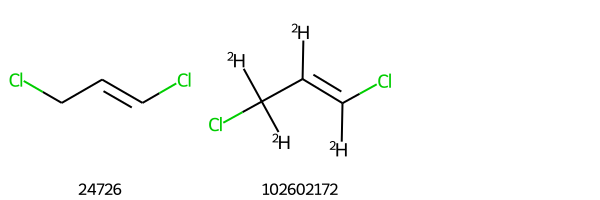

#### Identity_type: same_isotope
24726 "C(/C=C/Cl)Cl"
24883 "C(C=CCl)Cl"
5280970 "C(/C=C\Cl)Cl"


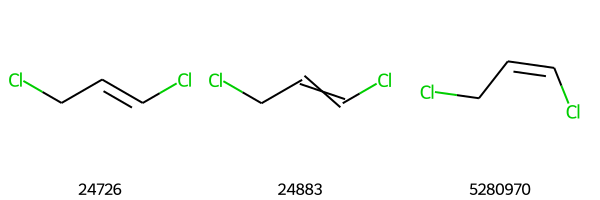

#### Identity_type: same_connectivity
24726 "C(/C=C/Cl)Cl"
24883 "C(C=CCl)Cl"
5280970 "C(/C=C\Cl)Cl"
102602172 "[2H]/C(=C(/[2H])\Cl)/C([2H])([2H])Cl"
131875718 "[2H]C(=C([2H])Cl)C([2H])([2H])Cl"


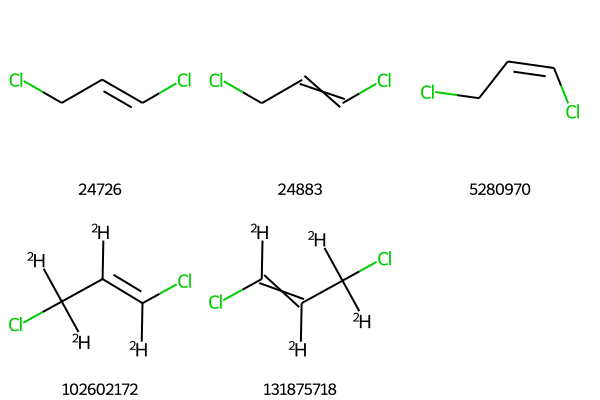

In [2]:
import requests
import time
import io #how to process incoming data slightly different than before

from rdkit import Chem
from rdkit.Chem import Draw

prolog = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"

mydata = { 'smiles' : 'C(/C=C/Cl)Cl' }
options = [ 'same_stereo_isotope', # This is the default
            'same_stereo',
            'same_isotope',
            'same_connectivity']

for myoption in ( options ) :

    print("#### Identity_type:", myoption)
    
    url = prolog + '/compound/fastidentity/smiles/property/isomericsmiles/csv?identity_type=' + myoption
    res = requests.post(url, data=mydata)
    
    mycids = []
    mysmiles = []
    
    file = io.StringIO(res.text)
    file.readline()               # Skip the first line (column heads)
    
    for line in file :
        
        ( cid_tmp, smiles_tmp ) = line.rstrip().split(',')
        print(cid_tmp, smiles_tmp)
        
        mycids.append( cid_tmp )
        mysmiles.append( smiles_tmp.replace('"',"") )

    mols = []
    
    for x in mysmiles :
        
        mol = Chem.MolFromSmiles(x)
        Chem.FindPotentialStereoBonds(mol)    # Identify potential stereo bonds!
        mols.append(mol)
    
    img = Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=(200,200), legends=mycids)
    display(img)
            
    time.sleep(0.2)

**Exercise 1a:** Find compounds that has the same atom connectivity and isotope information as the query molecule.

In [2]:
query = "CC1=CN=C(C(=C1OC)C)C[S@](=O)C2=NC3=C(N2)C=C(C=C3)OC"

For each compound returned from the search, retrieve the following information.
- CID
- Isomeric SMILES string
- chemical synonyms (for simplicity, print only the five synonyms that first occur in the name list retrieved for each compound)
- Structure image


In [3]:
mydata = {'smiles': query}
options = ['same_connectivity', 'same_isotope']
proinput = 'compound/fastidentity/smiles'
op_ls = ['property/IsomericSmiles', 'synonyms']
output = 'csv?identity_type='

for myoption in (options):
    
    print("#### Identity_type:", myoption)
    url = prolog + '/' + proinput + '/'  + 'property/isomericsmiles' + '/' + output + myoption
    res = requests.post (url, data=mydata)
    url_syn = prolog + '/' + 'compound/fastidentity/cid/'+ i + '/synonyms/txt?identity_type=' + myoption
    res1 = requests.post (url_syn, data=mydata)
    print(res1.text)
    #ls_syn = res1.text.split('\n')
    mysmiles = []
    synonyms = []
    
    #url = prolog + '/' + 'compound/fastidentity/cid/'+ i + '/synonyms/txt?identity_type=' + myoption
    #res1 = requests.post (url, data=mydata)
    #ls_syn = res1.text.split('\n')
    #print(len(ls_cids))
            
    file = io.StringIO(res.text and res1.text)
    file.readline()


  
    for line in file:
        print(line)
        '''
        #mycids = []
        
        ( cid_tmp, smiles_tmp ) = line.rstrip().split(',')
        print(cid_tmp, smiles_tmp)
        
        
        for i in mycids:
            
            url = prolog + '/' + 'compound/fastidentity/cid/'+ i + '/synonyms/txt?identity_type=' + myoption
            res1 = requests.post (url, data=mydata)
            
            ls_syn = res1.text.split('\n')
            for x in range(5):
                print(ls_syn[x], end = ',')
        mycids.append(cid_tmp)
        mysmiles.append(smiles_tmp.replace('"',""))
        
        mols = []
        
        for x in mysmiles:
            
            mol = Chem.MolFromSmiles(x)
            Chem.FindPotentialStereoBonds(mol)
            mols.append(mol)
            
            img = Draw.MolsToGridImage(mols, molsPerRow = 3, subImgSize =(200,200), legends=mycids)
            display(img)
        
        time.sleep(0.2)
'''        

#### Identity_type: same_connectivity


NameError: name 'i' is not defined

In [ ]:
# Write your code in this cell.
mydata = {'smiles': query}
options = ['same_connectivity', 'same_isotope']
proinput = 'compound/fastidentity/smiles'
op_ls = ['property/IsomericSmiles', 'synonyms']
output = 'csv?identity_type='

for myoption in (options):
    
    print("#### Identity_type:", myoption)
    #for i in op_ls:
        #if i == 'synonyms':
            #url = prolog + '/' + proinput + '/' + i + '/txt?identity_type=' + myoption
            #res = requests.post(url, data=mydata)
            
        #else:
            #url = prolog + '/' + proinput + '/'  + i + '/' + output + myoption
            #res = requests.post(url, data=mydata)
    #url = prolog + '/' + proinput + '/'  + 'cids' + '/' + output + myoption 
    #res = requests.post (url, data=mydata)
    
    #url = prolog + '/' + proinput + '/'  + 'synonyms' + '/' + output + myoption
    #res = requests.post(url, data=mydata)
    
    url = prolog + '/' + proinput + '/'  + 'property/isomericsmiles' + '/' + output + myoption
    res = requests.post (url, data=mydata)
    
    #url = prolog + '/' + 'compound/fastidentity/cid/'+ 'synonyms/txt?identity_type=' + myoption
    #res1 = requests.post(url, data=mydata)
    #print(res1.text)
    #print(res1.text.split())
    #print(res.text)
    mycids = []
    mysmiles = []
    #synonyms = []
    #print(res.text)
    
    file = io.StringIO(res.text)
    file.readline()
#'''
    for line in file:
        #mycids = []
        
        ( cid_tmp, smiles_tmp ) = line.rstrip().split(',')
        print(cid_tmp, smiles_tmp)
        
        
        mycids.append(cid_tmp)
        mysmiles.append(smiles_tmp.replace('"',""))
        
        #print(len(mycids))
        for i in mycids:
            if i == cid_tmp :
                url = prolog + '/' + 'compound/fastidentity/cid/'+ i + '/synonyms/txt?identity_type=' + myoption
                res1 = requests.post (url, data=mydata)
            
                ls_syn = res1.text.split('\n')
            
            #print(len(ls_cids))
            
            #count = 1
            for x in range(5):
                print(ls_syn[x], end=",")
                #count+=1
    mols = []
        
    for x in mysmiles:
            
        mol = Chem.MolFromSmiles(x)            
        Chem.FindPotentialStereoBonds(mol)
        mols.append(mol)
            
    img = Draw.MolsToGridImage(mols, molsPerRow = 3, subImgSize =(200,200), legends=mycids)
    display(img)
        
    time.sleep(0.2)
        
#'''


#### Identity_type: same_connectivity
9568614 "CC1=CN=C(C(=C1OC)C)C[S@](=O)C2=NC3=C(N2)C=C(C=C3)OC"
Esomeprazole,(S)-Omeprazole,(-)-Omeprazole,(S)-(-)-Omeprazole,119141-88-7,4594 "CC1=CN=C(C(=C1OC)C)CS(=O)C2=NC3=C(N2)C=C(C=C3)OC"
Esomeprazole,(S)-Omeprazole,(-)-Omeprazole,(S)-(-)-Omeprazole,119141-88-7,omeprazole,73590-58-6,Prilosec,Esomeprazole,Losec,9579578 "CC1=CN=C(C(=C1OC)C)C[S@@](=O)C2=NC3=C(N2)C=C(C=C3)OC"
omeprazole,73590-58-6,Prilosec,Esomeprazole,Losec,omeprazole,73590-58-6,Prilosec,Esomeprazole,Losec,(r)-omeprazole,119141-89-8,Esomeprazole,(+)-omeprazole,UNII-S51HU491WJ,16111637 "[2H]C1=C(C(=C(C(=N1)C([2H])([2H])S(=O)C2=NC3=C(N2)C=C(C=C3)OC([2H])([2H])[2H])C([2H])([2H])[2H])OC([2H])([2H])[2H])C([2H])([2H])[2H]"
(r)-omeprazole,119141-89-8,Esomeprazole,(+)-omeprazole,UNII-S51HU491WJ,(r)-omeprazole,119141-89-8,Esomeprazole,(+)-omeprazole,UNII-S51HU491WJ,(r)-omeprazole,119141-89-8,Esomeprazole,(+)-omeprazole,UNII-S51HU491WJ,SCHEMBL13645431,omeprazole,73590-58-6,Prilosec,Esomepra

SCHEMBL13645363,omeprazole,73590-58-6,Prilosec,Esomeprazole,SCHEMBL13645363,omeprazole,73590-58-6,Prilosec,Esomeprazole,SCHEMBL13645363,omeprazole,73590-58-6,Prilosec,Esomeprazole,SCHEMBL13645363,omeprazole,73590-58-6,Prilosec,Esomeprazole,SCHEMBL13645363,omeprazole,73590-58-6,Prilosec,Esomeprazole,SCHEMBL13645363,omeprazole,73590-58-6,Prilosec,Esomeprazole,SCHEMBL13645363,omeprazole,73590-58-6,Prilosec,Esomeprazole,SCHEMBL13645363,omeprazole,73590-58-6,Prilosec,Esomeprazole,SCHEMBL13645363,omeprazole,73590-58-6,Prilosec,Esomeprazole,SCHEMBL13645363,omeprazole,73590-58-6,Prilosec,Esomeprazole,SCHEMBL13645363,omeprazole,73590-58-6,Prilosec,Esomeprazole,SCHEMBL13645363,omeprazole,73590-58-6,Prilosec,Esomeprazole,SCHEMBL13645363,omeprazole,73590-58-6,Prilosec,Esomeprazole,SCHEMBL13645363,omeprazole,73590-58-6,Prilosec,Esomeprazole,SCHEMBL13645363,omeprazole,73590-58-6,Prilosec,Esomeprazole,SCHEMBL13645363,omeprazole,73590-58-6,Prilosec,Esomeprazole,SCHEMBL13645363,omeprazole,73590-58-6,Pr

## 2. Similarity search

PubChem supports 2-dimensional (2-D) and 3-dimensional (3-D) similarity searches.  Because molecular similarity is not a measurable physical observable but a subjective concept, many approaches have been developed to evaluate it.  Detailed discussion on how PubChem quantifyies molecular similarity, read the following LibreTexts page:
    
**Searching PubChem Using a Non-Textual Query** (https://bit.ly/2lPznCo)


The code cell below demonstrates how to perform 2-D and 3-D similarity searches.

In [4]:
mydata = { 'smiles' : "C1COCC(=O)N1C2=CC=C(C=C2)N3C[C@@H](OC3=O)CNC(=O)C4=CC=C(S4)Cl" }
url = prolog + "/compound/fastsimilarity_2d/smiles/cids/txt?Threshold=99"
res = requests.post(url,data=mydata)
cids = res.text.split()

print("# Number of CIDs:", len(cids))
print(cids)

# Number of CIDs: 36
['9875401', '6433119', '11524901', '25255944', '159596345', '154630277', '145624246', '145624236', '144489887', '143433422', '123868009', '68152323', '56598114', '56589668', '25190310', '25164166', '11994745', '25190129', '25190130', '25190186', '25190187', '25190188', '25190189', '25190190', '25190248', '25190249', '25190250', '25190251', '25190252', '25190311', '25255845', '25255945', '25255946', '49849874', '133687098', '156594383']


It is worth mentioning that the parameter name "Threshold" is **case-sensitive**.  If "threshold" is used (rather than "Threshold"), it will be ignored and the default value (0.90) will be used for the parameter.  \[As a matter of fact, all optional parameter names in PUG-REST are case-sensitive.]

In [5]:
url1 = prolog + "/compound/fastsimilarity_2d/smiles/cids/txt?Threshold=95"
url2 = prolog + "/compound/fastsimilarity_2d/smiles/cids/txt?threshold=95"  # "threshold=95" is ignored.

res1 = requests.post(url1,data=mydata)
res2 = requests.post(url2,data=mydata)
cids1 = res1.text.split()
cids2 = res2.text.split()

print("# Number of CIDs:", len(cids1), "vs.", len(cids2))

# Number of CIDs: 219 vs. 997


It is possible to run 3-D similarity search using PUG-REST.  However, because 3-D similarity search takes much longer than 2-D similarity search, it often exceeds the 30-second time limit and returns a time-out error, especially when the query molecule is big.

In addition, for 3-D similarity search, it is **not** possible to adjust the similarity threshold (that is, the optional "Threshold" parameter does not work).  3-D similarity search uses a shape-Tanimoto (ST) of >=0.80 and a color-Tanimoto (CT) of >=0.50 as a similarity threshold.  Read the libreTexts page for more details (https://bit.ly/2lPznCo).

In [6]:
mydata = { 'smiles' : 'CC(=O)OC1=CC=CC=C1C(=O)O'}
url = prolog + "/compound/fastsimilarity_3d/smiles/cids/txt"
res = requests.post(url, data=mydata)
cids = res.text.split()
print(len(cids))

2994


**Exercise 2a:** Perform 2-D similarity search with the following query, using a threshold of 0.80 and find the macromolecule targets of the assays in which the returned compounds were tested.  You will need to take these steps.

- Run 2-D similarity search using the SMILES string as a query (with Threshold=80).
- Retrieve the AIDs in which any of the returned CIDs was tested "active".
- Retrieve the gene symbols of the targets for the returned AIDs.

In [ ]:
query='[C@@H]23C(=O)[C@H](N)C(C)[C@H](CCC1=COC=C1)[C@@]2(C)CCCC3(C)C'

In [22]:
# Write your code in this cell.


url = prolog + "/gene/genesymbol/OPRK1/aids/txt"
res=requests.get(url)
aids=res.text.split()

for i in aids:
    url = prolog + "/assay/aid/" + i + "/cids/txt?cids_type=active"
    res1=requests.get(url)
    
    print(res1.text)


43345
135349
220852
631552
645247
648964
653411
658072
658931
660795
661974
662263
662887
662944
663290
759209
946504
1121183
1297443
1636023
1982054
2102682
2233212
2235475
2336835
2482316
2731162
2964155
3224942
3237419
3242935
3600301
3626869
3950572
3950926
3964693
4014737
4098324
4307489
4376926
5236771
5310369
6426773
6442840
9550139
11957712
16192384
16195713
16806301
24817992
135430590

2722
2788
6825
82533
93572
161167
237338
265940
272568
313619
330973
342201
360474
360560
373692
375895
628678
644442
644667
658872
659101
659226
664214
691499
739449
751739
752424
767374
793994
805087
823695
852940
891179
914701
917183
929896
948969
972862
972880
973504
1080132
1202405
1213087
1225439
1226677
1240113
1266032
1342143
1348398
1380883
1416668
1472216
1472222
1472225
1474489
1482058
1511784
1559438
1567094
1728272
1745927
1953598
2055076
2082094
2082098
2089261
2099944
2104451
2104499
2114858
2114872
2125555
2126292
2179291
2193022
2332535
2398303
2430298
2444453
2474590
2725458
27

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

5480230
9984781
11591805
44326480
44337616
44337617
44337618
44337643
44337644
44337673
44337749
44337750
44337764
44337765
44337783
44337822
44337823
44337830
44337831
44337832

5497186
44149909
44328387
44328406
44328435

5480230
44344830

5480230
9940052
10553426
11157443
11180584
11215747
11238343
11238737
11273472
11318909
11319221
11330655
11376776
11421830
11444917
11479033
11753736
11786990

5748293
44339409
44339472
44339521

5480230
9956146
10951763
11016305
11070421
11091606

5480230
44295785

5497186
44367028
44367136
44367182
44367308
44367339

Status: 503
Code: PUGREST.ServerBusy
Message: Too many requests or server too busy

5480230
9984781
11591805
44326480
44337616
44337617
44337618
44337643
44337644
44337673
44337749
44337750
44337764
44337765
44337783
44337822
44337823
44337830
44337831
44337832

5480230
44295

44298211

44298194

44298200

5288826

5288826
5485199
13893005
13893016
44382068
44382069
44382070
44382126
44382292
44382434
44382559
44382894
44383636

44460594
73346788

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

Status: 404
Code: PUGREST.

5284596
10677974

44279592
44279594
44279686
44279699

3036289

44306867

10677974

3036289
5359966
9804450
9897164
10078468
10462426
11204993
11239327
11262815
11308721
11364225
11434336

55652
3037926
10334091
11779453
12994686
44273397
44380980
44380994
44381112
68196155
73351393
73354381

105104
5462471
10323346
10435156
71450932
71456257
71456258
71461668

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

10102939
16133805
25079852
25087514
25087515
25087516

4741130
6542471

4058
5288826
49796881
49796882
49796888
49796889
49796890
49796891

5288826
49796881
49796882
49796890
49796891

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

105104
5360515
16099582
44369365
44369383
44369600
44369609
44369628
44369629
71456227

13893998
13893999

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

Status: 404
Code: PUGRES

Status: 503
Code: PUGREST.ServerBusy
Message: Too many requests or server too busy

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

Status: 404
Code: PUGREST.NotFound
M

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

11274203

190901
3082718
10342726
11201660
11270347
23594220
23594222
23594223
23594225
23594227
23594230
23594232
23594241
23594243
23594247
44399273
44399274
44399378
44399379
44399492
44399493
44399584
44399648
44399674
44399675
44399730

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

128563
644177
3036289
11440685
11705263
44415858
44415932
44416118
44416128
44456065
118718683
118718684
118718687
118718688
118718691

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for 

134131
5284596
5360515
16094317
16094318
16094319
16094320
16094321
16094322
16094342
16094343
16094344
16094345
16094347

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

16094344

16094343

128563
3036289
11327160
44403387
44419242
44419248

128563
3036289
11327160
44403387
44419242
44419248

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

5497186
44367136
44421393
44421396
44421399
44421400
44421401
44421403
44421406
44421407
44421408
44421409
44421412
44421422
46877642

5497186
44367136
44421393
44421396
44421399
44421400
44421401
44421403
44421406
44421407
44421408
44421409
44421412
44421422
46877642

Status: 503
Code: PUGREST.ServerBusy
Message: Too many requests or server too busy

5284596
5311304
5360515
9804450
44422807
44422808
71452742

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

3036289
5284596
5311304
9804450
44406696
44422807
44422808
71452742

Status: 404
Code: PUGREST.NotF

Status: 503
Code: PUGREST.ServerBusy
Message: Too many requests or server too busy

128563
11431898
11440685
11561040
11562400
11657075
11713930
16059781
24829369
24854099
24854100
24854101
24854102
24854177
24854178
24854179
24854180
24854260
24854261
24854262
24854263
24854264
44450499

128563
3036289
11431898
11561040
16059781
24854100
24854180
24854260

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

5288826
5462505
5492619
5492830
16039356
22816300
44450262

3082718
10005080
10053267
10076169
10256503
10273543
10345440
10347927
16133805
25169521
25169522
44448327
44448489
44448522
44448524
44448563

3082718
10005080
10053267
10076169
10256503
10273543
10345440
10347927
16133805
25169521
25169522
44448327
44448489
44448522
44448524
44448563

44448772
44448775
44448874
44448876
44448913
44448947
44449004
44449053
44449079
44449106
44449107
44449136
44449171
44449202
44449228

3037926

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the g

6540640
44417373
44541248
44541388
44541389

44541249
44541250
44541387

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

44474938

9911987
10206319
45483185
45483211
45483251
45483259
45483260
45483286
45483648
45483658
45483659
45483664
45483668

14570184
44138152
44311351
44597424
44597425
44597529
44597530

9804450
9897164
11677662
44597597
44597714
44597715
44597828
44597830
44597831
44597940
45483978
45483979

9804450
9897164
11677662
44597597
44597714
44597831
45483978

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

45482634

Status: 503
Code: PUGREST.ServerBusy
Message: Too many requests or server too busy

11714559
44598180
44598228
44598229
44598230
44598231
44598282
44598283
44598284

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

44598284

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

5288826
51003216
51003218

51002871
51002875
51002979
51002980
51003037
51003038
51003040
51003041
51003097
51003098
51003099
51003100

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

5311340
52915030
52915031
52915032
52915269
52915270
52915389
52915390
52915391
52915392
52915393
52915514
52915515
52915516
52915517
52915518
52915634
52915635
52915636
52915637
52916598
52916599
52916712
52916713
52916714

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

5359966
9798655
9804450
11303119
11392313
44429058
46928474
46928475
46928476
46928478
46928581
51353734
51353736
51353738
51353740
51353742
51353744
51356293
51356294
51356295
51356296
51356297
51356590
51356591
51356593
51356594
51357141
51357143
51357420
54581367
54583374

5359966
6604724
9798655
11303119
46928475
46928478
51353736
51353744
51356293
51356294
51356295
51357420

Status: 404
Code

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

45271055

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

Status: 503
Code: PUGREST.ServerBusy
Message: Too many requests or server too busy

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

3036289

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

71457289
71457290
71457291
71457292
71460943
71460945
71462655

71450134
71453774
71457289
714572

66553195
72712370

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

72713098
72713099
72713100
72713101
72713102
72713104
76324412

16082873
72713098
72713099
72713101
72713102
72713103
76324412
90664881

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

72713100
72713104

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

16720648
72711408
72711409
72711410
76324401
76331610

9804450
16720648
72711408
72711409
72711410
76324401

44336365

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

5360515
76309826
76309827
76309828
76313542
76313543
76313544
76317053
76317054
76317055
76317056
76317057
76320762
76327982
76331634
76331635
76331636
76335253
76335254

5360515
76313542
76331635
76335253

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

Status: 404
Code: P

9906198
118711887

9906198
58408526
118711743
118711875
118711876
118711877
118711878
118711879
118711880
118711881
118711882
118711883
118711884
118711885
118711887

66986402

118711293

105104
101806592

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

23542099
118726271

179340
780684
1121183
2162753
118725739
118725740
118725741
118725742
118725743
118725744
118725745
118725746
118725747
118725750
118725751
118725752
118725754
118725836
118725837
118725838
118725839
118725840
118725841
118725842
118725843
118725844
118725845
118725846
118725848
118725849
118725850
118725851
118725852
118725853
118725854
118725855
118725856
118725857
118725858

5480230
9956146
44129648

105104
5288826
118731405
118731406
118731407
118731408
118731409
118731410
118731411
118731412
118731413
118731414
118731415
118731416
118731417
118731418
118731419
118731420
118731421
118731422
118731423
118731424
118731425
118731426
118731427
118731428

3036289
118731410
118731411
118

25075996
127041368

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

127028132
127028133
127028436
127028437
127029584

127028132
127028436
127028437
127029584

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

5284595
5288826

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

5284596
68775633
127033106

105104
42636619
68775633
68776073
86648371
118710805
127033106

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

68775633
68776073
118710805
127033106

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

127032208
127032210
127032211
127032212
127033399
127033967

Status: 404
Code: PUGREST.NotFound
Mess

90467377
117844268
117854138

Status: 503
Code: PUGREST.ServerBusy
Message: Too many requests or server too busy

5480230

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

3036289
145957352

3036289
145957352

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

54596311

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

9956146
134347873
134347875
134347910
134355238
134355252
134355266
134355432
134355434
134355436
134355468
134355469
134355528
134355541
134355576
134355597
134355603
134355604
134355612
139433200

9956146
11016305
134347870
134347895
134347943
134355237
134355249
134355250
134355256
134355257
134355274
134355405
134355416
134355423
134355456
134355462
134355475
134355482
134355483
134355490
134355493
134355527
134355536
134355540
134355558
134355565
134355572
134355575
134355580
134355583
134355586
134355590
134355595
134355596
134355610
134355613
139433185
139433188
139433208
139

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

52210045
72153748
93967682
94156776
95261164
145974323

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

118872292

155536080

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

155515982
155552185

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

155511793
155513639
155517279
155518809
155519089
155520586
155521065
155521726
155528738
155533802
1

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

3036289

3036289
156011204
156012281
156017178

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

44256416
156012174
156013448
156017485
156021069

44256416
156021069

Status: 404
Code: PUGREST.NotFound
Message: No CIDs found for the given AID(s)

156013219
156013414
156015766

5497186
122633395
122633436

9931141
71460942
156009506
156009540
156010407
156010419
156010471
156010916
156010967
156011033
156011089
156011211
156011239
156012508
156012937
156013730
156013796
156014399
156014654
156015003
156015005
156015418
156016017
156016282
156017329
156017544
156017670
156017849
156018208
156018361
156019147
156019389
156019450
156019589
15602

## 3. Substructure/Superstructure search

When a chemical structure occurs as a part of a bigger chemical structure, the former is called a substructure and the latter is referred to as a superstructure (https://bit.ly/2lPznCo).  PUG-REST supports both substructure and superstructure searches.  For example, below is an example for substructure search using the core structure of antibiotic drugs called cephalosporins as a query (https://en.wikipedia.org/wiki/Cephalosporin). 

In [ ]:
query = 'C12(SCC(=C(N1C([C@H]2NC(=O)[*])=O)C(=O)O[H])[*])[H]'

mydata = { 'smiles' : query }
url = prolog + "/compound/fastsubstructure/smiles/cids/txt?Stereo=exact"
res = requests.post(url, data=mydata)
cids = res.text.split()

print("# Number of CIDs:", len(cids))
#print(cids)

An important thing to remember about substructure search is that, if the query structure is not specific enough (that is, not big enough), it will return too many hits for the PubChem server can handle.  For example, if you perform substructure search using the "C-C" as a query, it will give you an error, because PubChem has ~96 million (organic) compounds with more than two carbon atoms and most of them will have the "C-C" unit. Therefore, if you get an "time-out" error while doing substructure search, consider providing more specific structure as an input query.

**Exercise 3a:** Below is the SMILES string for a HCV (Hepatitis C Virus) drug (Sovaldi).  Perform substructure search using this SMILES string as a query, identify compounds that are mentioned in patent documents, and create a list of the patent documents that mentioning them.

- Use the default options for substructure search.
- Use the "XRefs" operation to retrieve Patent IDs associated with the returned compounds.
- For simplicity, ignore the CID-Patent ID mapping.  (That is, no need to track which CID is associated with which patent document.)

In [ ]:
query="C[C@@H](C(=O)OC(C)C)N[P@](=O)(OC[C@@H]1[C@H]([C@@]([C@@H](O1)N2C=CC(=O)NC2=O)(C)F)O)OC3=CC=CC=C3"

In [ ]:
# Write your code in this cell.




## 4. Molecular formula search

Strictly speaking, molecular formula search is not structure search, but its PUG-REST request URL is constructed in a similar way to structure searches like identity, similarity, and substructure/superstructure searches.

In [ ]:
query = 'C22H28FN3O6S'    # Molecular formula for Crestor (Rosuvastatin: CID 446157)

url = prolog + "/compound/fastformula/"+ query + "/cids/txt"
res = requests.get(url)
cids = res.text.split()
print("# Number of CIDs:", len(cids))
#print(cids)

It is possible to allow other elements to be present in addition to those specified by the query formula, as shown in the following example.


In [ ]:
url = prolog + "/compound/fastformula/"+ query + "/cids/txt?AllowOtherElements=true"
res = requests.get(url)
cids = res.text.split()
print("# Number of CIDs:", len(cids))
#print(cids)

**Exercise 4a:**  The general molecular formula for alcohols is $C_{n}H_{(2n+2)}O$ \[for example, CH4O (methanol), C2H6O (ethanol), C3H8O (propanol), etc].  Run molecular formula search using this general formula for n=1 through 20 and retrieve the XLogP values of the returned compounds for each value of n.  Print the minimum and maximum XLogP values for each n value.

In [ ]:
# Write your code in this cell.


